# Apple Music Top 10000 Tracks

## Step 1: Select a real-world dataset

## Description of the dataframe: 
### This dataset contains 10,000 tracks from Apple Music, covering various genres and cultural influences. It's useful for studying music trends, building recommendation systems, and conducting data science analyses. The dataset includes columns like Artist Name, Track Name, Genre, and Release Date. Data collection follows ethical guidelines and respects copyright laws. Thanks to Apple Music and hosting platforms for their support.

## Step 2: Perform data preparation and cleaning

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
apple_music_dataframe = pd.read_csv('apple_music_dataset.csv')
apple_music_dataframe.head()

,artistId,artistName,collectionCensoredName,collectionId,collectionName,collectionPrice,contentAdvisoryRating,country,currency,discCount,...,primaryGenreName,releaseDate,trackCensoredName,trackCount,trackExplicitness,trackId,trackName,trackNumber,trackPrice,trackTimeMillis
0,46087,Erick Sermon,Music,298321651,Music,9.99,Explicit,USA,USD,1,...,Hip-Hop/Rap,2001-08-27T12:00:00Z,Music (feat. Marvin Gaye),16,explicit,298321904,Music,4,1.29,223133
1,20044,Madonna,Music,80815197,Music,9.99,NaN,USA,USD,1,...,Pop,2000-08-21T07:00:00Z,Music,10,notExplicit,80815173,Music,1,1.29,225973
2,486597,Journey,Greatest Hits (2024 Remaster),169003304,Greatest Hits (2024 Remaster),10.99,NaN,USA,USD,1,...,Rock,1981-06-03T07:00:00Z,Don't Stop Believin' (2024 Remaster),16,notExplicit,169003415,Don't Stop Believin' (2024 Remaster),2,1.29,250835
3,156987,Jason Mraz,We Sing. We Dance. We Steal Things,277635758,We Sing. We Dance. We Steal Things,11.99,NaN,USA,USD,1,...,Pop,2008-02-12T08:00:00Z,I'm Yours,12,notExplicit,277635828,I'm Yours,2,1.29,242947
4,46087,Erick Sermon,Music,298429528,Music,9.99,Clean,USA,USD,1,...,Hip-Hop/Rap,2001-05-29T07:00:00Z,Music (feat. Marvin Gaye),16,cleaned,298429596,Music,4,1.29,223133


In [3]:
print("Number of rows in the dataset",apple_music_dataframe.shape[0])
print("Number of columns in the dataset",apple_music_dataframe.shape[1])

Number of rows in the dataset 10000
Number of columns in the dataset 24


In [4]:
apple_music_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   artistId                10000 non-null  int64  
 1   artistName              10000 non-null  object 
 2   collectionCensoredName  10000 non-null  object 
 3   collectionId            10000 non-null  int64  
 4   collectionName          10000 non-null  object 
 5   collectionPrice         9919 non-null   float64
 6   contentAdvisoryRating   1512 non-null   object 
 7   country                 10000 non-null  object 
 8   currency                10000 non-null  object 
 9   discCount               10000 non-null  int64  
 10  discNumber              10000 non-null  int64  
 11  isStreamable            9999 non-null   object 
 12  kind                    10000 non-null  object 
 13  previewUrl              10000 non-null  object 
 14  primaryGenreName        10000 non-null 

### Observations:
#### 1. artistId, collectionId, discCount, discNumber, trackCount, trackId, trackNumber, trackTimeMillis are Integer type
#### 2. collectionPrice and trackPrice are Float type
#### 2. artistName, collectionCensoredName, collectionName, contentAdvisoryRating, country, currency, isStreamable, kind, previewUrl, primaryGenreName, releaseDate, trackCensoredName, trackExplicitness, trackName are objects

In [5]:
#printing missing values
missingValues = apple_music_dataframe.isnull().sum()
missingValues

artistId                     0
artistName                   0
collectionCensoredName       0
collectionId                 0
collectionName               0
collectionPrice             81
contentAdvisoryRating     8488
country                      0
currency                     0
discCount                    0
discNumber                   0
isStreamable                 1
kind                         0
previewUrl                   0
primaryGenreName             0
releaseDate                  0
trackCensoredName            0
trackCount                   0
trackExplicitness            0
trackId                      0
trackName                    0
trackNumber                  0
trackPrice                  24
trackTimeMillis              0
dtype: int64

### Observations: 
#### We can see that collectionPrice, contentAdvisoryRating, isStreamable and trackPrice has missing values so we can drop those rows.

In [6]:
apple_music_dataframe= apple_music_dataframe.dropna(subset=['collectionPrice', 'contentAdvisoryRating', 'isStreamable', 'trackPrice'])

In [7]:
#printing missing values after dropping the rows
missingValuesAfterDropping = apple_music_dataframe.isnull().sum()
missingValuesAfterDropping

artistId                  0
artistName                0
collectionCensoredName    0
collectionId              0
collectionName            0
collectionPrice           0
contentAdvisoryRating     0
country                   0
currency                  0
discCount                 0
discNumber                0
isStreamable              0
kind                      0
previewUrl                0
primaryGenreName          0
releaseDate               0
trackCensoredName         0
trackCount                0
trackExplicitness         0
trackId                   0
trackName                 0
trackNumber               0
trackPrice                0
trackTimeMillis           0
dtype: int64

### Observations: 
#### There are no missing values now in the dataset

## Exploratory Data Analysis

In [8]:
apple_music_dataframe.describe(include='all')

,artistId,artistName,collectionCensoredName,collectionId,collectionName,collectionPrice,contentAdvisoryRating,country,currency,discCount,...,primaryGenreName,releaseDate,trackCensoredName,trackCount,trackExplicitness,trackId,trackName,trackNumber,trackPrice,trackTimeMillis
count,1.494000e+03,1494,1494,1.494000e+03,1494,1494.000000,1494,1494,1494,1494.000000,...,1494,1494,1494,1494.000000,1494,1.494000e+03,1494,1494.000000,1494.000000,1494.000000
unique,NaN,392,559,NaN,559,NaN,2,1,1,NaN,...,20,728,1225,NaN,2,NaN,1223,NaN,NaN,NaN
top,NaN,Wiz Khalifa,Fetty Wap (Deluxe Edition),NaN,Fetty Wap (Deluxe Edition),NaN,Explicit,USA,USD,NaN,...,Hip-Hop/Rap,2015-09-25T07:00:00Z,In My Feelings,NaN,explicit,NaN,In My Feelings,NaN,NaN,NaN
freq,NaN,59,31,NaN,31,NaN,1419,1494,1494,NaN,...,846,41,5,NaN,1419,NaN,5,NaN,NaN,NaN
mean,2.678672e+08,NaN,NaN,7.570908e+08,NaN,10.239793,NaN,NaN,NaN,1.035475,...,NaN,NaN,NaN,13.786479,NaN,7.570911e+08,NaN,6.500669,1.253608,233804.510710
std,3.312072e+08,NaN,NaN,4.465855e+08,NaN,3.762115,NaN,NaN,NaN,0.188625,...,NaN,NaN,NaN,5.812134,NaN,4.465856e+08,NaN,5.030483,0.229468,57930.390354
min,1.447800e+04,NaN,NaN,1.264578e+06,NaN,-1.000000,NaN,NaN,NaN,1.000000,...,NaN,NaN,NaN,1.000000,NaN,1.264511e+06,NaN,1.000000,-1.000000,15160.000000
25%,4.488522e+06,NaN,NaN,3.417517e+08,NaN,9.990000,NaN,NaN,NaN,1.000000,...,NaN,NaN,NaN,12.000000,NaN,3.417517e+08,NaN,2.000000,1.290000,202509.250000
50%,1.577491e+08,NaN,NaN,6.799726e+08,NaN,10.990000,NaN,NaN,NaN,1.000000,...,NaN,NaN,NaN,15.000000,NaN,6.799737e+08,NaN,5.000000,1.290000,228504.500000
75%,4.099721e+08,NaN,NaN,1.081197e+09,NaN,11.990000,NaN,NaN,NaN,1.000000,...,NaN,NaN,NaN,18.000000,NaN,1.081197e+09,NaN,10.000000,1.290000,259666.750000


### Observations:
#### 1. Artist Name: There are 392 unique artist names, with "Wiz Khalifa" being the most frequent, appearing 59 times.
#### 2. Collection Censored Name: There are 559 unique collection censored names, with "Fetty Wap (Deluxe Edition)" being the most frequent, appearing 31 times.
#### 3. Content Advisory Rating: Majority of the data (1419 out of 1494) have explicit content advisory rating.
#### 4. Country: All the data points are from the USA.
#### 5. Collection Price: The average collection price is approximately 10.24, with a minimum of -1 (indicating missing or invalid values) and a maximum of 19.99.
#### 6. Track Price: The average track price is approximately 6.50, with a minimum of -1 (indicating missing or invalid values) and a maximum of 30.00.
#### 7. Release Date: The data spans from 2015-09-25 to present, with "In My Feelings" being the most common track censored name, appearing 5 times.
#### 8. Track Explicitness: Majority of the tracks (1419 out of 1494) have explicit content.
#### 9. Track Time Millis: The average track duration is approximately 233,805 milliseconds (approximately 3 minutes and 54 seconds), with a minimum of 15,160 milliseconds and a maximum of 943,529 milliseconds.

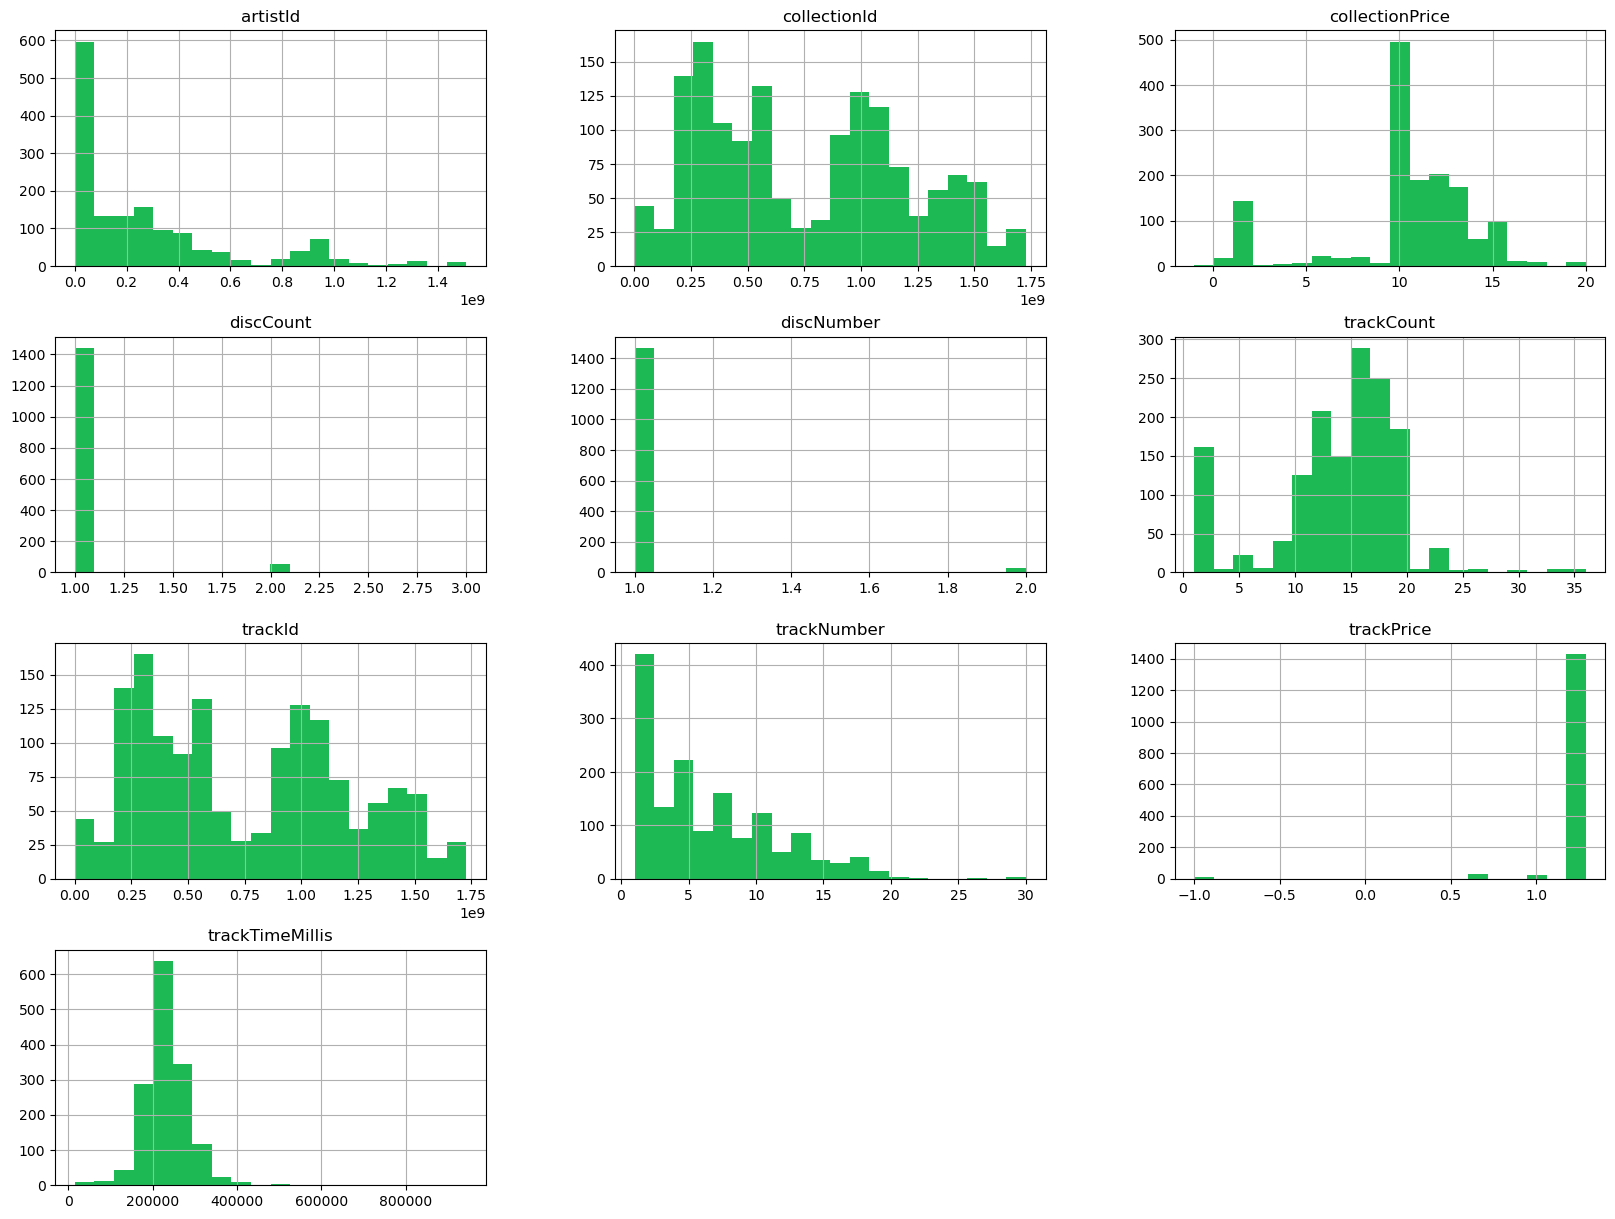

In [9]:
apple_music_dataframe.hist(bins=20, figsize=(20,15), color=["#1DB954"])
plt.show()

### Observations:
#### 1. Disc Preference: The distribution of disc count (discCount) leans left, indicating that a majority of albums likely have zero or one disc, with a smaller portion having two or more discs.
#### 2. Distribution of Songs: Artist IDs (artistid), Track IDs (trackid), Track Count (trackCount), Track Numbers (trackNumber), Track Durations (trackTimeMillis) are heavily right-skewed which means that there are many songs with low values (fewer songs per artist, shorter durations) and very few songs with high values(many songs by a few artists, longer songs).
#### 3. Track Pricing: The track price (trackPrice) distribution appears left-skewed, implying there might be a larger portion of tracks with lower prices and a smaller number with higher prices.

### Explore the relationship between various columns

#### 1. Most popular artists on Apple Music

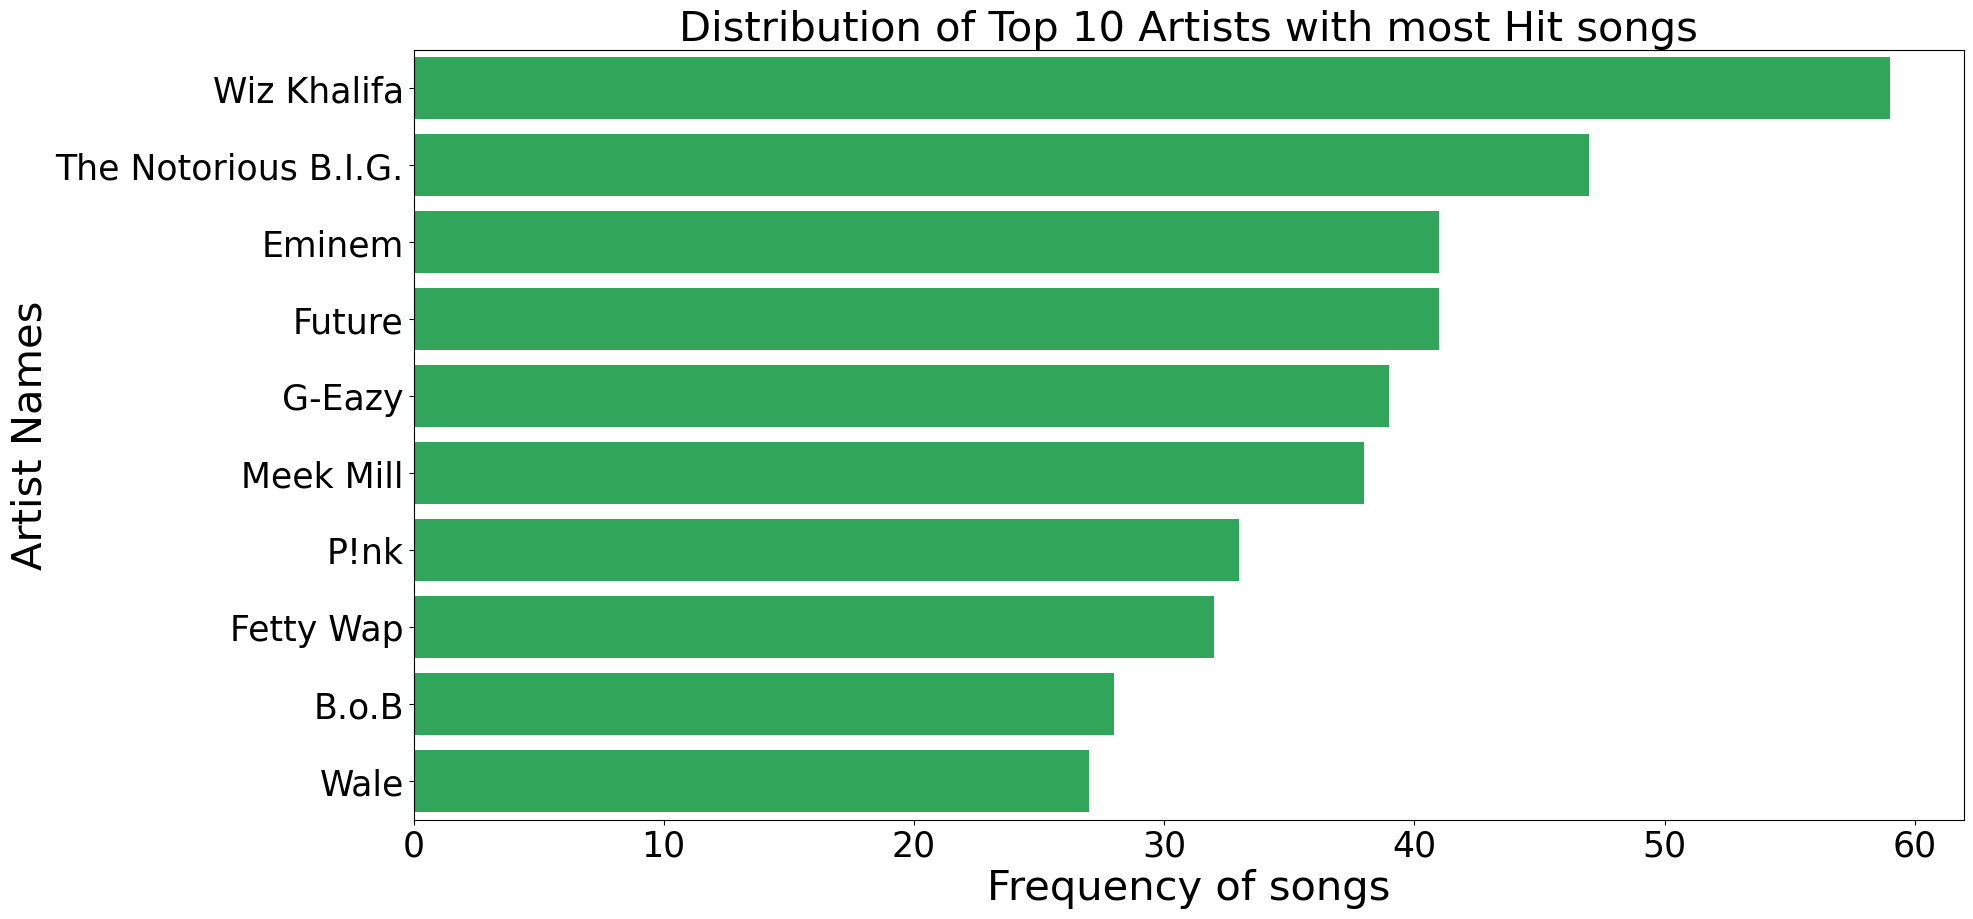

In [10]:
plt.figure(figsize=(20, 10))

# Group by 'Artist Name' and get the count of songs for each artist
totalNoOfArtists = apple_music_dataframe.groupby('artistName').size().sort_values(ascending=False)
top10ArtistsAccordingFrequent = totalNoOfArtists.head(10)

sns.barplot(y=top10ArtistsAccordingFrequent.index, x=top10ArtistsAccordingFrequent.values, color="#1DB954")

plt.title("Distribution of Top 10 Artists with most Hit songs", size=30)
plt.ylabel("Artist Names", size=30)
plt.xlabel("Frequency of songs", size=30)
plt.xticks(size=25)
plt.yticks(size=25)
plt.show()

#### 2. Most popular song on Apple Music

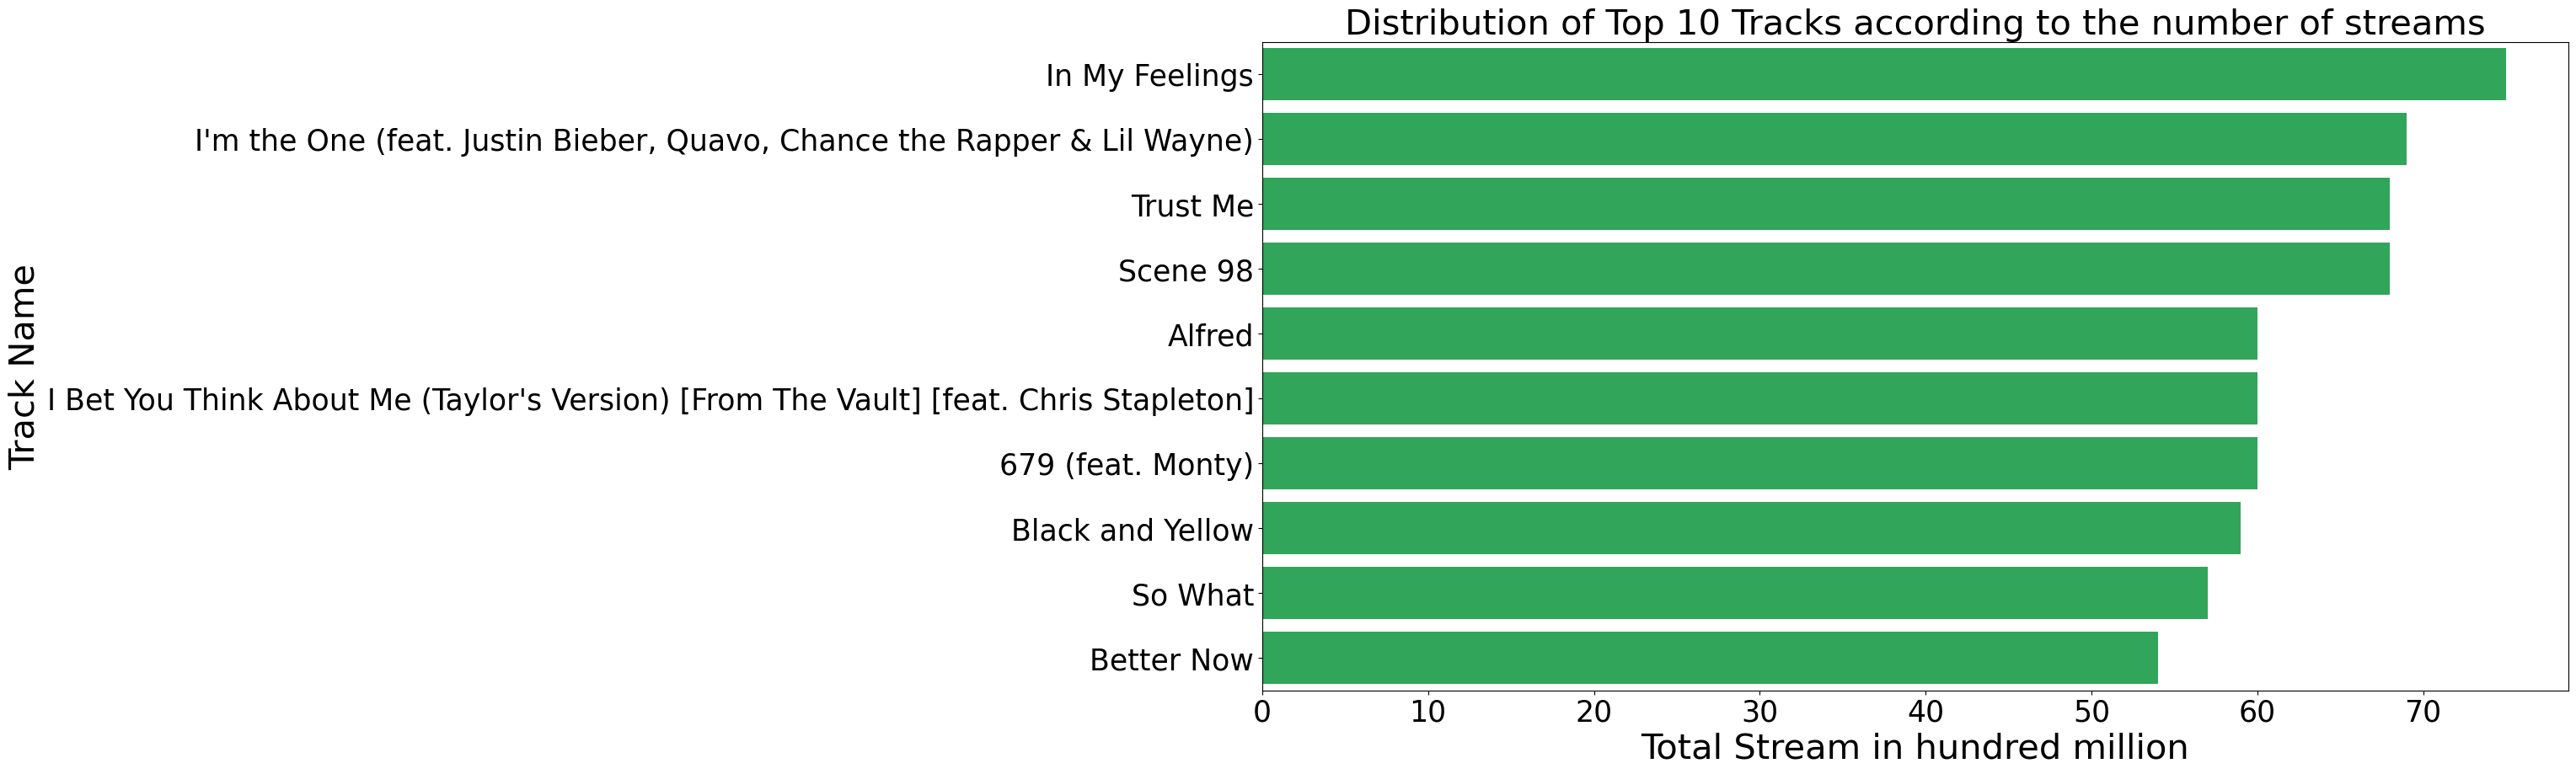

In [11]:
plt.figure(figsize=(20, 10))

# Group by 'trackName' and 'Total Tracks' to get top 10 songs based on tracks

top10SongAccordingToStreams = apple_music_dataframe.groupby('trackName')['trackCount'].sum().sort_values(ascending=False)
top10Songs = top10SongAccordingToStreams.head(10)

sns.barplot(y=top10Songs.index, x=top10Songs.values, color="#1DB954")

plt.title("Distribution of Top 10 Tracks according to the number of streams", size=30)
plt.ylabel("Track Name", size=30)
plt.xlabel("Total Stream in hundred million", size=30)
plt.xticks(size=25)
plt.yticks(size=25)
plt.show()

#### 3. Price Distribution Across Tracks in Apple Music Collection

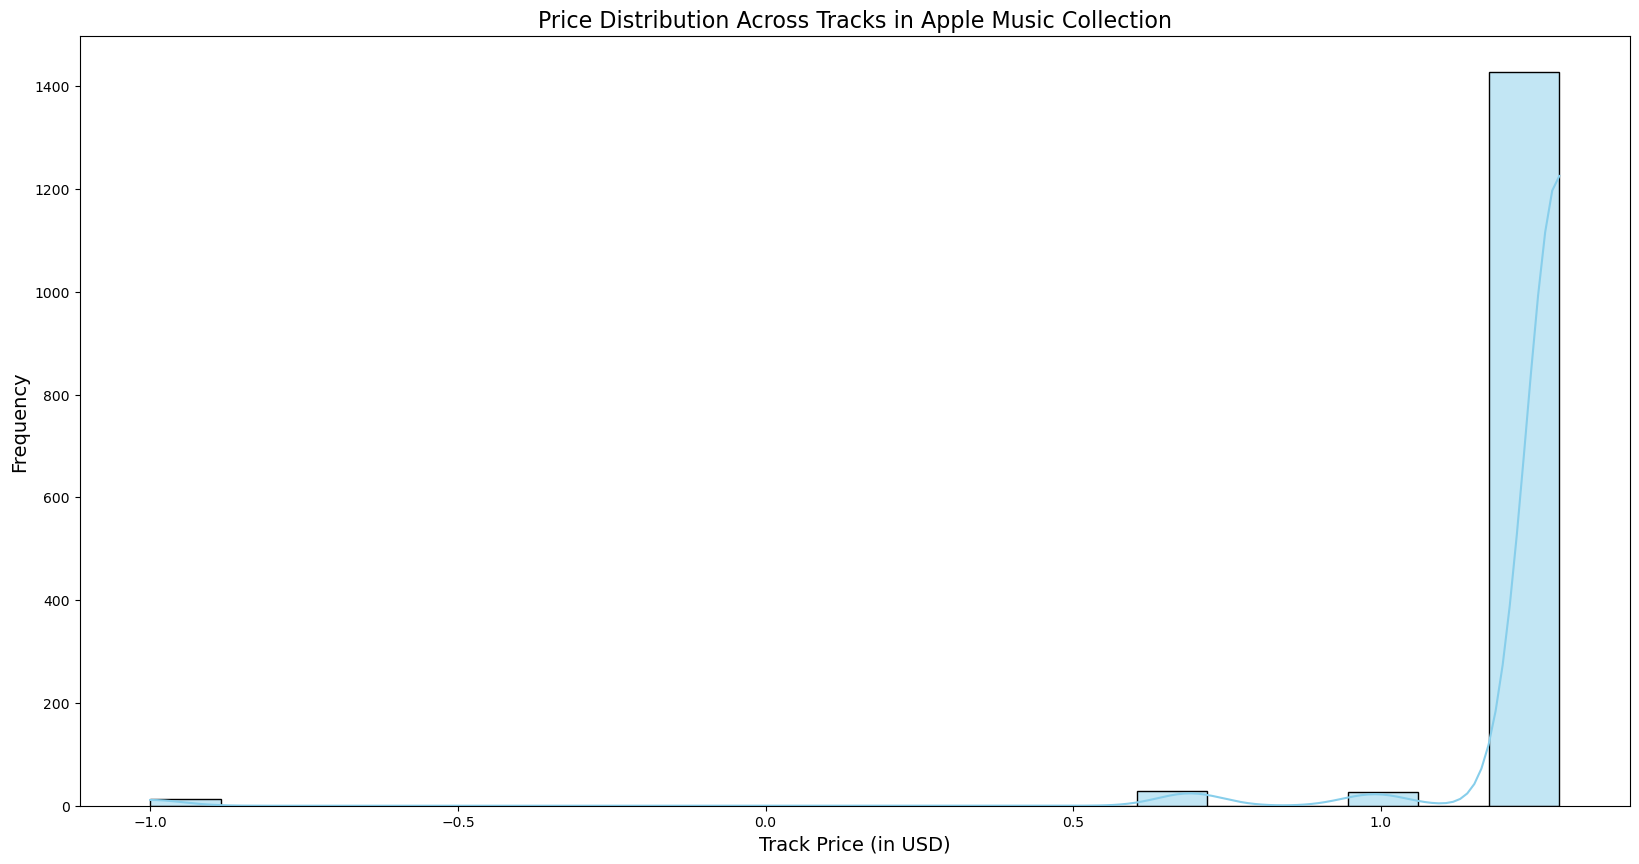

In [12]:
plt.figure(figsize=(20, 10))

# Plot the price distribution using a histogram
sns.histplot(apple_music_dataframe['trackPrice'], bins=20, kde=True, color='skyblue')

plt.title('Price Distribution Across Tracks in Apple Music Collection', fontsize=16)
plt.xlabel('Track Price (in USD)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.show()

#### 4.Distribution of Tracks Across Genres within a Single Country

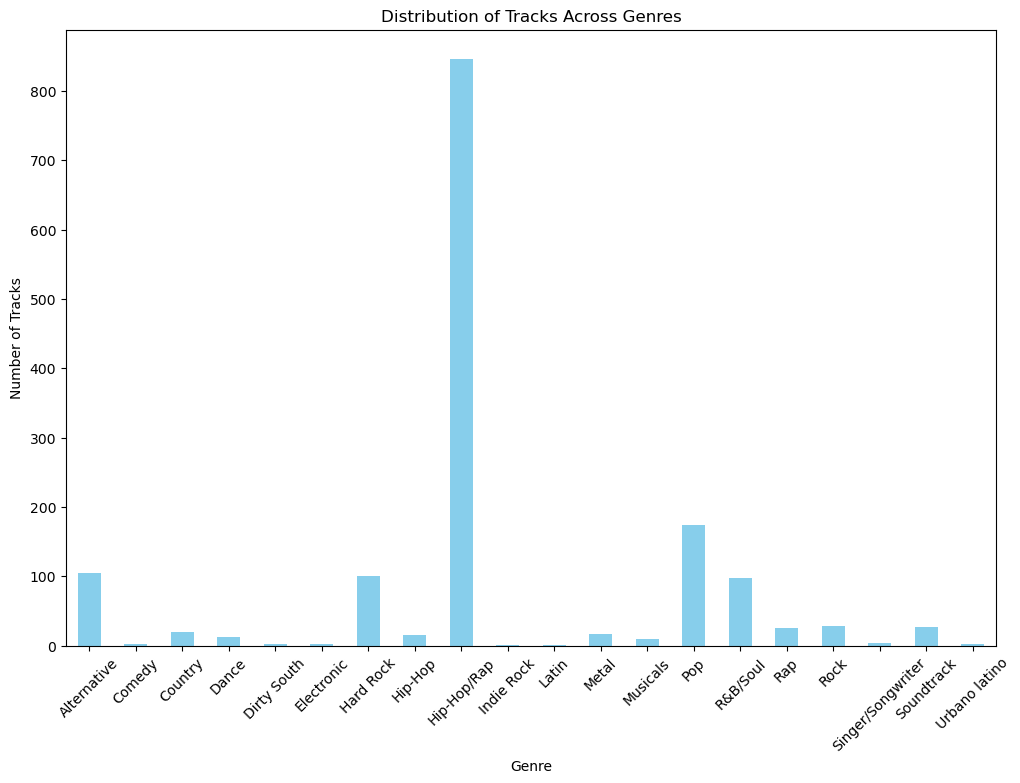

In [13]:
genre_counts = apple_music_dataframe.groupby('primaryGenreName')['country'].count()

plt.figure(figsize=(12, 8))

# Create a bar chart to visualize the distribution of tracks across genres
genre_counts.plot(kind='bar', color='skyblue')

plt.title('Distribution of Tracks Across Genres')
plt.xlabel('Genre')
plt.ylabel('Number of Tracks')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

plt.show()

In [14]:
apple_music_dataframe['trackPrice_per_track'] = apple_music_dataframe['trackNumber'] * apple_music_dataframe['collectionPrice']
features = ['trackNumber', 'collectionPrice', 'trackPrice', 'trackPrice_per_track']
X = apple_music_dataframe[features]
y = apple_music_dataframe['trackCount']  

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
linear_reg_model = LinearRegression()

# Train the model
linear_reg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = linear_reg_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f'Linear Regression Model:')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared Score: {r2}')

Linear Regression Model:
Mean Absolute Error: 2.2184881232459706
Mean Squared Error: 9.667547877928765
Root Mean Squared Error: 3.1092680614460964
R-squared Score: 0.6986544923378806


### Observations: 
#### 1. The Linear Regression model demonstrates a moderately strong fit to the provided dataset.
#### 2. The R-squared value of approximately 0.69 indicates that around 70% of the variance in track count is explained by the model, suggesting a moderate level of explanatory power.
#### 3. The Mean Absolute Error (MAE) of approximately 2.21, Mean Squared Error (MSE) of approximately 9.66, and Root Mean Squared Error (RMSE) of approximately 3.10 indicate moderate prediction errors. While these errors are not negligible, they are relatively low compared to the scale of the target variable, implying that the model is capturing a considerable portion of the variability in track count. Further consideration of alternative regression techniques may enhance model performance.

In [16]:
# Create a Decision Tree model
decision_tree_model = DecisionTreeRegressor(random_state=42)

# Train the model
decision_tree_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_tree = decision_tree_model.predict(X_test)

# Evaluate the model
mae_tree = mean_absolute_error(y_test, y_pred_tree)
mse_tree = mean_squared_error(y_test, y_pred_tree)
rmse_tree = mean_squared_error(y_test, y_pred_tree, squared=False)
r2_tree = r2_score(y_test, y_pred_tree)

print(f'Decision Tree Model:')
print(f'Mean Absolute Error: {mae_tree}')
print(f'Mean Squared Error: {mse_tree}')
print(f'Root Mean Squared Error: {rmse_tree}')
print(f'R-squared Score: {r2_tree}')

Decision Tree Model:
Mean Absolute Error: 2.1997482222920377
Mean Squared Error: 9.61878581196372
Root Mean Squared Error: 3.1014167427102923
R-squared Score: 0.7001744464884503


### Observations:
#### 1. The Decision Tree Regressor performed reasonably well on the provided dataset.
#### 2. The R-squared value of 0.70017 indicates that the Decision Tree model explains approximately 70% of the variance in the total streams, suggesting a moderate ability to capture the underlying patterns in the data.
#### 3. However, the elevated Mean Absolute Error(MAE) of 2.19,  Mean Squared Error (MSE) of 9.61  and Root Mean Squared Error (RMSE) of 3.10 suggest the presence of prediction errors. It's worth considering ensemble methods like Random Forest could further enhance predictive performance.

In [17]:
# Create a Random Forest model
random_forest_model = RandomForestRegressor(random_state=42)

# Train the model
random_forest_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = random_forest_model.predict(X_test)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest Model:')
print(f'Mean Absolute Error: {mae_rf}')
print(f'Mean Squared Error: {mse_rf}')
print(f'Root Mean Squared Error: {rmse_rf}')
print(f'R-squared Score: {r2_rf}')

Random Forest Model:
Mean Absolute Error: 2.1361524135436634
Mean Squared Error: 8.415335941816352
Root Mean Squared Error: 2.90091984408676
R-squared Score: 0.7376869798262389


### Observations: 
#### 1. The Random Forest Regressor has also demonstrated moderate performance.
#### 2. The R-squared value of 0.737 indicates that the Random Forest model explains approximately 73.7% of the variance in total streams, signifying a moderate ability to capture complex patterns in the data.
#### 3.The Mean Absolute Error(MAE) of 2.136, Mean Squared Error (MSE) of 8.41 and Root Mean Squared Error (RMSE) of 2.90 are significantly lower when compared to the Decision Tree model suggesting a substantial reduction in prediction errors, highlighting the effectiveness of the Random Forest ensemble in improving predictive accuracy.

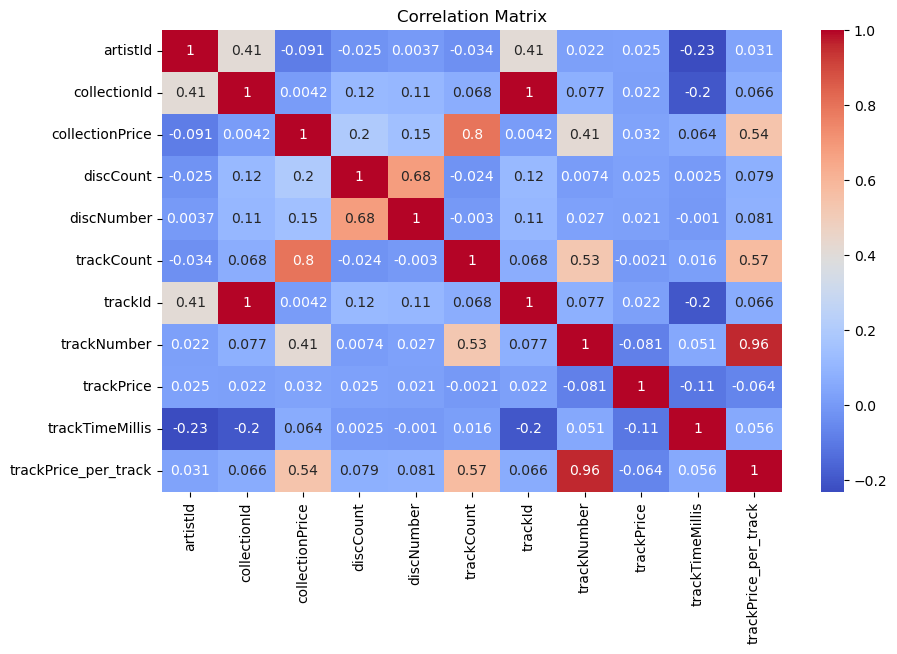

In [18]:
 numeric_data = apple_music_dataframe.select_dtypes(include=[np.number])

correlation_matrix = numeric_data.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Observations:
#### 1.There is a positive correlation between track count and collection price (0.8). This means that collections with more tracks tend to be more expensive.
#### 2.There is a positive correlation between discount count and disc number (0.68). This may indicate that collections with more discs tend to have more discounts available.
#### 3.There is a positive correlation between track number and track price per track (0.96). This means that tracks with a higher number within a collection tend to be more expensive per track.

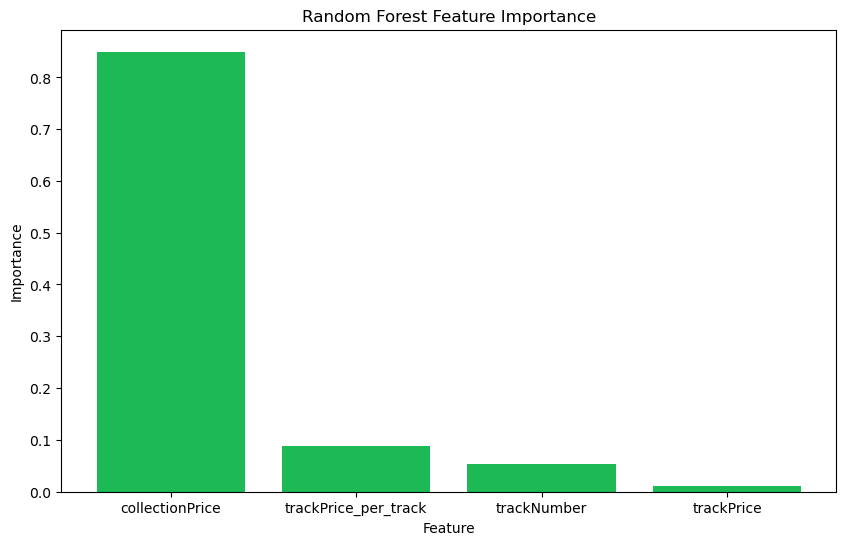

In [19]:
feature_importances = random_forest_model.feature_importances_

# Get feature names
feature_names = X_train.columns

# Sort feature importances in descending order
indices = feature_importances.argsort()[::-1]

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), feature_importances[indices], align="center", color=["#1DB954"])
plt.xticks(range(X_train.shape[1]), feature_names[indices])
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Random Forest Feature Importance")
plt.show()

### Feature Importances:
#### The bar plot depicting feature importances in the Random Forest model reveals the relative contribution of each feature to the prediction of total tracks.
#### 'collectionPrice' appears to be the most influential feature, followed by 'trackPrice_per_track','trackNumber' and 'trackPrice' , emphasizing their importance in determining total tracks.
#### Feature importances provide insights into the variables that significantly impact the model's predictions, aiding in the interpretation of the model's decision-making process.

## Conclusion:
#### To conclude, we used data from Apple Music's Top 10,000 Streamed Songs to analyze the most popular songs and artists on Apple. The machine learning algorithms we applied for analysis included Linear Regression, Decision Tree Regressor, and Random Forest Regressor.

#### We found that the Random Forest Regressor is the good fit with the lowest Mean Absolute Error(MAE) of 2.13, Mean Squared Error (8.41), the lowest Root Mean Squared Error (2.900), and the highest R-squared (74%) values when compared to the Decision Tree and Linear Regression. 

#### In conclusion, the Random Forest Regressor emerges as the most promising model for this task, demonstrating superior predictive performance and showcasing its dominance in today's music industry.